# Challenge 3: Parameter Estimation 1

The first step is to import relevant libraries.

In [96]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

The second step is to import data from the given file.

In [95]:
df = pd.DataFrame.from_csv("3challenge-1.csv")
dftraining = df.loc[~np.isnan(df['label'])]
dftesting = df.loc[np.isnan(df['label'])]
print(dftraining.shape)
print(dftesting.shape)

(5000, 9)
(5000, 9)


c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [97]:
TrainingData = dftraining.as_matrix(columns=None)
TestData = dftesting.as_matrix(columns=['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7'])

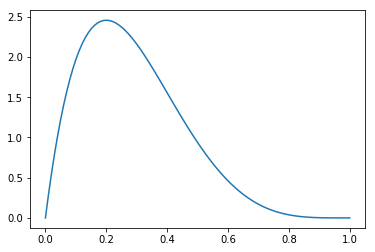

In [98]:
rv = beta(2, 5)
x = np.linspace(0, 1, 100)
plt.plot(x, rv.pdf(x))

In [100]:
"""
The MAP (maximum a posteriori) estimator

t(MAP) = argmax f(t) * f(x1, x2, ..., x8 | t)

f(t) = Beta(2,5) = t * (1 - t)^4 / (B(2,5))            

f(x1, ..., x8 | t) = (multiply for i =1,...8) [(40 choose xi) * t^(xi) * (1 - t)^(40 - xi)]
                   = C1 * t^sum(xi) * (1 - t)^(320 - sum(xi)) 
Hence
t(MAP) = argmax  C2 * t^(1 + sum(xi)) * (1 - t)^(324 - sum(xi)) = argmax f(t)

Differntiate wrt to t and set differntion equal to zero to get max

d/dt (f(t)) = C2 * [ (1 + sum(xi)) t^(sum(xi) * (1 - t)^(324 - sum(xi) - (324 - sum(xi)) * (1 - t)^(323 - sum(xi))* t^(1 + sum(xi))]
            = C2 * t^(sum(xi) * (1 - t)^(323 - sum(xi)) [(1 + sum(xi)) * (1 -t) - t * (324 - sum(xi))] = 0

or
    [(1 + sum(xi)) * (1 -t) - t * (324 - sum(xi))] = 0
    
    t = (1 + sum(xi))/325

hence

    t(MAP) = (1 + sum(xi))/325
            
"""
print("Math to find the MAP estimator")

Math to find the MAP estimator


In [104]:
#ytrain_pred = TrainingData[:,0:8].sum(axis=1)/(40*8)            # Maximum likelyhood estimator
ytrain_pred = (1 + TrainingData[:,0:8].sum(axis=1))/(325)        # MAP estimator
ytrain = TrainingData[:,8]


mse = np.mean((ytrain - ytrain_pred)**2)
print(mse)

y_pred = (1 + TestData[:,0:8].sum(axis=1))/(325) 
dftesting['label'] = y_pred
#print(dftesting)

0.000551408752708


After creating an algorithm and generating labels, one should update the original CSV file.

In [105]:
df = pd.concat([dftraining, dftesting], join='outer', ignore_index=True)
df.to_csv("3challenge-1.csv")